# Danish Khan
### Week 5 Assignment
### DSC 550 Data Mining
### 12/7/2023

In [1]:
import pandas as pd
import matplotlib.pyplot as mpl
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.porter import PorterStemmer
import string
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_table('labeledTrainData.tsv')

df.head(5)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


### Get stemmed data using the same process you did in Week 3.

In [3]:
# process the same text data using the same method and functions as in Week 3

# function to convert letters to lowercase
def text_lower(text):
    return text.lower()

# function to remove punctuation and special characters using built-in string functions
def no_punctuation(text):
    text = [word for word in text if word not in string.punctuation]
    text = ''.join(text)
    return text

# function to remove stop words
def no_stop_words(text):
    return ' '.join([word for word in word_tokenize(text) if not word in stop_words])

# function to use NLTK to remove word affixes
def no_affix(text):
    porter = PorterStemmer()
    return ' '.join([porter.stem(word) for word in word_tokenize(text)])

stop_words = stopwords.words('english')

df['lower'] = df['review'].apply(text_lower)
df['no_punctuation'] = df['lower'].apply(no_punctuation)
df['no_stop_words'] = df['no_punctuation'].apply(no_stop_words)
df['stemmed_review'] = df['no_stop_words'].apply(no_affix)
df = df.drop(columns=['review', 'lower', 'no_punctuation', 'no_stop_words'])

df.head(5)

,id,sentiment,stemmed_review
0,5814_8,1,stuff go moment mj ive start listen music watc...
1,2381_9,1,classic war world timothi hine entertain film ...
2,7759_3,0,film start manag nichola bell give welcom inve...
3,3630_4,0,must assum prais film greatest film opera ever...
4,9495_8,1,superbl trashi wondrous unpretenti 80 exploit ...


### Split this into a training and test set.

In [4]:
features = df['stemmed_review']
target = df['sentiment']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=1)

### Fit and apply the tf-idf vectorization to the training set.

In [5]:
tfvec = TfidfVectorizer()
tfvec.fit(features_train)
features_train_tfvec = tfvec.transform(features_train)

### Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).

In [6]:
features_test_tfvec = tfvec.transform(features_test)

Fitting the tf-idf vectorization of the training set allows it to learn to learn the words and their consistent distribution. Fitting the tf-idf vectorization to the test set would affect the words and distribution learned from the training set, altering the model's accurate performance when evaluating the test set. This why tf-idf vectorization has not been applied on the test set.

### Train a logistic regression using the training data.

In [7]:
model1 = LogisticRegression()
model1.fit(features_train_tfvec, target_train)

LogisticRegression()

### Find the model accuracy on test set.

In [8]:
accuracy1 = model1.score(features_test_tfvec, target_test)
print("Accuracy: {:.2f}%".format(accuracy1*100))

Accuracy: 88.66%


### Create a confusion matrix for the test set predictions.

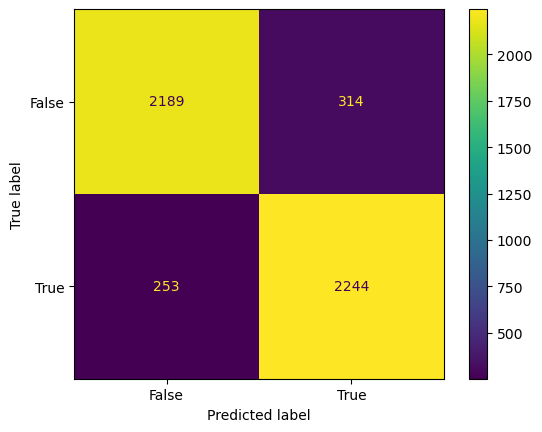

In [9]:
# predict the test data
target_predict1 = model1.predict(features_test_tfvec)

# create confusion matrix
cm1 = confusion_matrix(target_test, target_predict1)
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = [False, True])
cm1_display.plot()

### Get the precision, recall, and F1-score for the test set predictions.

In [10]:
# get precision score
precision_score1 = precision_score(target_test, target_predict1)
print("Precision Score: {:.2f}%".format(precision_score1*100))

# get recall score
recall_score1 = recall_score(target_test, target_predict1)
print("Recall Score: {:.2f}%".format(recall_score1*100))

# get F1 score
f1_score1 = f1_score(target_test, target_predict1)
print("F1 Score: {:.2f}%".format(f1_score1*100))

Precision Score: 87.72%
Recall Score: 89.87%
F1 Score: 88.78%


### Create a ROC curve for the test set.

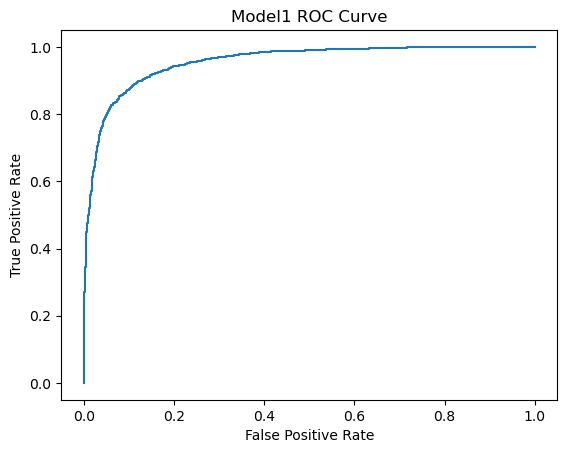

In [11]:
target_predict_probability1 = model1.predict_proba(features_test_tfvec)[:,1]
fpr1, tpr1, threshold1 = roc_curve(target_test, target_predict_probability1)

mpl.plot(fpr1,tpr1)
mpl.title("Model1 ROC Curve")
mpl.ylabel("True Positive Rate")
mpl.xlabel("False Positive Rate")
mpl.show()

### Pick another classification model you learned about this week and repeat the last 5 steps.

In [12]:
# train a random forest classifier using the training data

model2 = RandomForestClassifier()
model2.fit(features_train_tfvec, target_train)

RandomForestClassifier()

In [13]:
# find the model accuracy on test set

accuracy2 = model2.score(features_test_tfvec, target_test)
print("Accuracy: {:.2f}%".format(accuracy2*100))

Accuracy: 84.62%


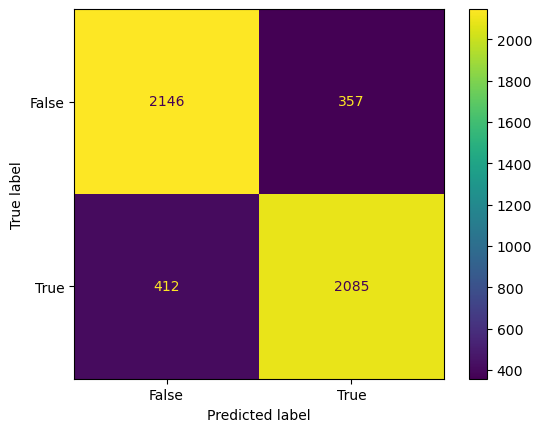

In [14]:
# create a confusion matrix for the test set predictions

# predict the test data
target_predict2 = model2.predict(features_test_tfvec)

# create confusion matrix
cm2 = confusion_matrix(target_test, target_predict2)
cm2_display = ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = [False, True])
cm2_display.plot()

In [15]:
# get the precision, recall, and F1-score for the test set predictions

# get precision score
precision_score2 = precision_score(target_test, target_predict2)
print("Precision Score: {:.2f}%".format(precision_score2*100))

# get recall score
recall_score2 = recall_score(target_test, target_predict2)
print("Recall Score: {:.2f}%".format(recall_score2*100))

# get F1 score
f1_score2 = f1_score(target_test, target_predict2)
print("F1 Score: {:.2f}%".format(f1_score2*100))

Precision Score: 85.38%
Recall Score: 83.50%
F1 Score: 84.43%


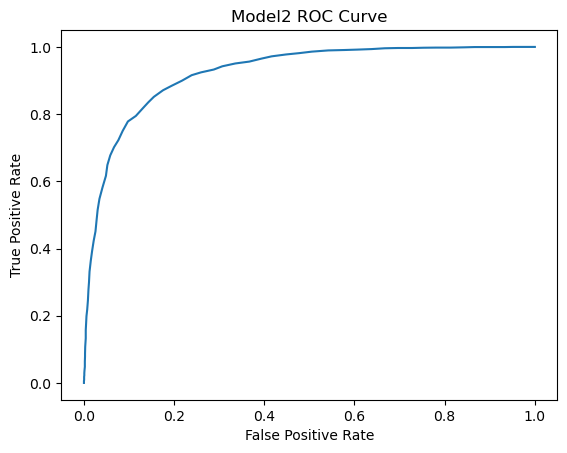

In [16]:
# create a ROC curve for the test set

target_predict_probability2 = model2.predict_proba(features_test_tfvec)[:,1]
fpr2, tpr2, threshold2 = roc_curve(target_test, target_predict_probability2)

mpl.plot(fpr2,tpr2)
mpl.title("Model2 ROC Curve")
mpl.ylabel("True Positive Rate")
mpl.xlabel("False Positive Rate")
mpl.show()